In [3]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

%matplotlib inline

label_encoder = preprocessing.LabelEncoder()

In [8]:
data1 = pd.read_csv("data/phishing_websites.csv").astype('category')
data2 = pd.read_csv("data/online_shoppers_intention.csv")
data1.drop(['id'], axis=1, inplace=True)


### phishing data preprocessing

In [9]:
col_to_one_hot = []
for i, col in enumerate(data1):
    # print(col, data1[col].unique())
    if data1[col].unique().size > 2:
        col_to_one_hot.append(col)
df_one_hot = data1[col_to_one_hot]
df_one_hot = pd.get_dummies(df_one_hot)
df_other = data1.drop(col_to_one_hot, axis=1)
data1 = pd.concat([df_one_hot, df_other], axis=1)
data1.head()
data1.describe(include='all')

,URL_Length_-1,URL_Length_0,URL_Length_1,having_Sub_Domain_-1,having_Sub_Domain_0,having_Sub_Domain_1,SSLfinal_State_-1,SSLfinal_State_0,SSLfinal_State_1,URL_of_Anchor_-1,...,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Page_Rank,Google_Index,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.0,11055.0,11055.0,11055.0,11055.0,11055.0,11055.0,11055.0,11055.0,11055.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9740.0,10579.0,8918.0,10043.0,5866.0,7612.0,8201.0,9516.0,9505.0,6157.0
mean,0.810493,0.012212,0.177295,0.304206,0.327635,0.368159,0.321755,0.105563,0.572682,0.296879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.391929,0.109835,0.381936,0.460091,0.469372,0.482327,0.467171,0.307292,0.494711,0.456904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### online shopper data preprocessing

In [15]:
columns_to_encode = ['Month', 'VisitorType','Weekend','Revenue']
label_encoder = preprocessing.LabelEncoder()
df = data2[columns_to_encode]
df = df.apply(label_encoder.fit_transform)
data2 = data2.drop(columns_to_encode, axis=1)
data2 = pd.concat([data2, df], axis=1)
data2.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,2,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,2,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,2,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,2,2,1,0


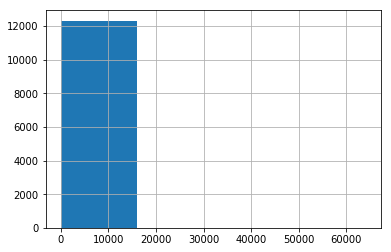

In [6]:
data2['ProductRelated_Duration'].hist(bins=4)